** Jorge Vera Moreno **

### Plotting functions in polar coordinates in an iPython notebook

A polar function $r(\theta)$ can be plotted using $\mathbf {NumPy}$ and the $\mathbf {matplotlib}$ library.

To do so, it is convenient to recall the following formulae that link $x, y$ in Cartesian coordinates to $r, \theta$ in polar coordinates:

$$ x = r \cos(\theta) \\
y = r \sin(\theta) $$

The first step is to import $\mathbf {NumPy}$ and the $\mathbf {matplotlib}$ library:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#Produce matplotlib plots in the notebook, not in a separate window:
%matplotlib inline

A function that returns the Cartesian coordinates of a point in polar coordinates can now be defined using the previous equations:

In [3]:
def cartesian(r,t):
    #The function takes the radius r and angle t (in radians) and returns the Cartesian conversion
    x=r*np.cos(t)
    y=r*np.sin(t)
    return x,y

We can check that this function returns the correct values by testing an example. The point that is a distance $1$ from the origin at a $\pi/4\, \mathsf{rad}$ angle to the $x$-axis (anticlockwise) is the point $(\sqrt{2},\sqrt{2})$:

In [4]:
cartesian(1,np.pi/4)

(0.70710678118654757, 0.70710678118654746)

We see that the function returns the expected result. We can now define any function in terms of $r,\theta$ and convert them to $x,y$ using the `cartesian` function. In this case, we'll define the function $$r(\theta)=\theta^2-\ell$$
where $\ell$ is an arbitrary constant:

In [5]:
def func(t,k):
    return t**2-k
#The letter 'k' was used in the code instead of 'l' because it's easy to confuse it with the digit 1

We can proceed to plot it in the interval $0<\theta<10\pi$. The arbitrary constant will be set to $\ell=0.1$:

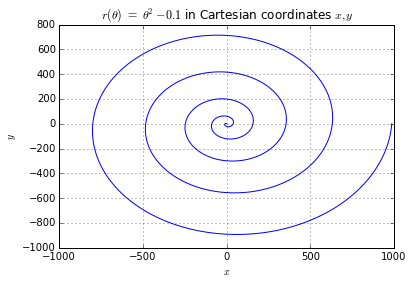

In [6]:
#Define the domain of the function in polar coords. as 1000 evenly spaced points between 0 and 10pi
theta = np.linspace(0,10*np.pi,1000)
#The function in Cartesian coordinates is determined by calling the 'cartesian' function
#with 'theta' in place of 't' (angle) and the function in place of 'r' (radial distance).
#The function in turn is determined by calling 'func', with 'theta' as domain and 0.1 as constant
x,y = cartesian(func(theta,0.1),theta)
#Set plot title, labels and grid.
plt.title(r'$r(\theta)\,=\,\theta^2-0.1$ in Cartesian coordinates $x,y$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)
#Plot the function
plt.plot(x,y)

To see how the spiral $r(\theta)$ varies as $\ell$ varies, we can plot a spiral for five equally spaced values of $\ell$ starting at 0 and ending at 10:

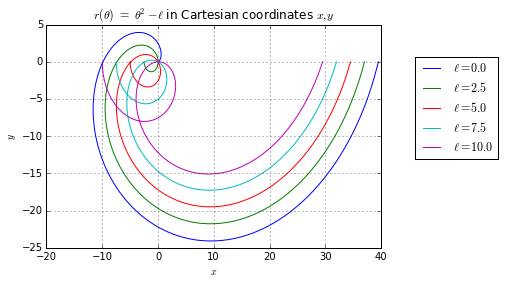

In [7]:
#Define 5 equally spaced values of the constant starting at 0 and ending at 10
k = np.linspace(0,10,5)
#Define the angular domain as 1000 equally spaced values of the constant starting at 0 and ending at 2pi
phi = np.linspace(0,2*np.pi,1000)
#Add a spiral to the plot for each value of the arbitrary constant
for i in k:
    #Convert the polar function with 'phi' as domain and arbitrary constant 'i' (in 'k') to Cartesian coords.
    x,y = cartesian(func(phi,i),phi)
    #Add the current spiral to the plot, with the appropriate label.
    #By putting '%s' between apostrophes, and putting '%i' outside of the apostrophes, '%s' is replaced
    #to the current value of 'i'
    plt.plot(x,y, label='$\ell= %s $'%i)
#Set plot title, labels, grid and legend at a suitable location.  
plt.title(r'$r(\theta)\,=\,\theta^2-\ell$ in Cartesian coordinates $x,y$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)
plt.legend(loc=(1.1,0.4))